# Step 1: Video library

In [1]:
from pytube import YouTube

# Path
SAVE_PATH = "C:/Users/algba/AIhwks/HWK2"  # Your specified path

# Links of the videos to be downloaded
video_urls = [
    'https://www.youtube.com/watch?v=wbWRWeVe1XE',
    'https://www.youtube.com/watch?v=FlJoBhLnqko',
    'https://www.youtube.com/watch?v=Y-bVwPRy_no'
]

for link in video_urls:
    try:
        # Object creation using YouTube
        yt = YouTube(link)

        # Get the video title for naming the subtitle file
        video_title = yt.title

        # Get all streams and filter for mp4 files
        mp4_streams = yt.streams.filter(file_extension='mp4').order_by('resolution').desc()

        if mp4_streams:
            # Get the video with the highest resolution
            d_video = mp4_streams.first()

            try:
                # Download the video
                video_file = d_video.download(output_path=SAVE_PATH)
                print(f'Video downloaded successfully: {link}')

                # Download captions (subtitles)
                captions = yt.captions.get_by_language_code('en')
                if captions:
                    # Save captions to file
                    caption_file = f"{SAVE_PATH}/{video_title}.srt"
                    with open(caption_file, 'w', encoding='utf-8') as f:
                        f.write(captions.generate_srt_captions())

                    print(f'Captions downloaded successfully: {link}')
                else:
                    print(f'No English captions available for: {link}')

            except Exception as e:
                print(f"Download Error: {e}")
        else:
            print(f"No mp4 streams available for this video: {link}")

    except Exception as e:
        print(f"Connection Error: {e}")

print('Task Completed!')

Connection Error: get_throttling_function_name: could not find match for multiple
Connection Error: HTTP Error 400: Bad Request
Connection Error: get_throttling_function_name: could not find match for multiple
Task Completed!


In [ ]:
### Checking files

In [45]:
import os
from moviepy.editor import VideoFileClip
import pysrt

# Directory where the downloaded videos and captions are stored
download_path = r'C:\Users\algba\AIhwks\HWK2'

# Verify if the directory exists
if not os.path.exists(download_path):
    print(f"Directory does not exist: {download_path}")
else:
    print(f"Directory exists: {download_path}")

# List the downloaded files
files = os.listdir(download_path)
print("Downloaded files:", files)

# Print the full paths of the files
full_paths = [os.path.join(download_path, f) for f in files]
print("Full file paths:", full_paths)

Directory exists: C:\Users\algba\AIhwks\HWK2
Downloaded files: ['.ipynb_checkpoints', 'autoencoder_model.h5', 'detected_objects', 'download_log.txt', 'FlJoBhLnqko.mp4', 'FlJoBhLnqko.srt', 'HWK2.ipynb', 'processed_frames', 'wbWRWeVe1XE.mp4', 'wbWRWeVe1XE.srt', 'Y-bVwPRy_no.mp4', 'Y-bVwPRy_no.srt']
Full file paths: ['C:\\Users\\algba\\AIhwks\\HWK2\\.ipynb_checkpoints', 'C:\\Users\\algba\\AIhwks\\HWK2\\autoencoder_model.h5', 'C:\\Users\\algba\\AIhwks\\HWK2\\detected_objects', 'C:\\Users\\algba\\AIhwks\\HWK2\\download_log.txt', 'C:\\Users\\algba\\AIhwks\\HWK2\\FlJoBhLnqko.mp4', 'C:\\Users\\algba\\AIhwks\\HWK2\\FlJoBhLnqko.srt', 'C:\\Users\\algba\\AIhwks\\HWK2\\HWK2.ipynb', 'C:\\Users\\algba\\AIhwks\\HWK2\\processed_frames', 'C:\\Users\\algba\\AIhwks\\HWK2\\wbWRWeVe1XE.mp4', 'C:\\Users\\algba\\AIhwks\\HWK2\\wbWRWeVe1XE.srt', 'C:\\Users\\algba\\AIhwks\\HWK2\\Y-bVwPRy_no.mp4', 'C:\\Users\\algba\\AIhwks\\HWK2\\Y-bVwPRy_no.srt']


# 2.1 Preprocess the video

In [2]:
import cv2
import numpy as np
import os

def decode_frames(video_path):
    # Step 1: Decode frames
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()
    print(f"Decoded {len(frames)} frames from {video_path}")
    return frames

def sample_frames(frames, sample_rate=10):
    # Step 2: Sample frames
    sampled_frames = frames[::sample_rate]
    print(f"Sampled {len(sampled_frames)} frames")
    return sampled_frames

def resize_frames(frames, size=(224, 224)):
    # Step 3: Resizing
    resized_frames = [cv2.resize(frame, size) for frame in frames]
    print(f"Resized frames to {size}")
    return resized_frames

def preprocess_frames(frames):
    # Step 4: Scaling, normalizing, and correcting color mode
    processed_frames = []
    for frame in frames:
        # Convert to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Normalize to [0, 1]
        frame = frame / 255.0
        processed_frames.append(frame)
    print(f"Preprocessed {len(processed_frames)} frames")
    return np.array(processed_frames)

def save_frames(frames, save_path):
    # Step 5: Save frames
    np.save(save_path, frames)
    print(f"Frames saved to {save_path}")

def preprocess_video(video_path, output_path, sample_rate=10, size=(224, 224)):
    frames = decode_frames(video_path) # Step 1: Decode frames
    if frames:
        sampled_frames = sample_frames(frames, sample_rate)  # Step 2: Sample frames
        resized_frames = resize_frames(sampled_frames, size) # Step 3: Resizing
        processed_frames = preprocess_frames(resized_frames) # Step 4: Scaling, normalizing, and correcting color mode
        save_frames(processed_frames, output_path) # Step 5: Save frames
    else:
        print(f"No frames decoded from {video_path}")

if __name__ == '__main__':
    video_dir = r'C:\Users\algba\AIhwks\HWK2'
    output_dir = r'C:\Users\algba\AIhwks\HWK2\processed_frames'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    video_files = [
        'wbWRWeVe1XE.mp4',
        'FlJoBhLnqko.mp4',
        'Y-bVwPRy_no.mp4'
    ]

    for video_file in video_files:
        video_path = os.path.join(video_dir, video_file)
        output_path = os.path.join(output_dir, video_file.replace('.mp4', '.npy'))
        preprocess_video(video_path, output_path)


Decoded 8204 frames from C:\Users\algba\AIhwks\HWK2\wbWRWeVe1XE.mp4
Sampled 821 frames
Resized frames to (224, 224)
Preprocessed 821 frames
Frames saved to C:\Users\algba\AIhwks\HWK2\processed_frames\wbWRWeVe1XE.npy
Decoded 5499 frames from C:\Users\algba\AIhwks\HWK2\FlJoBhLnqko.mp4
Sampled 550 frames
Resized frames to (224, 224)
Preprocessed 550 frames
Frames saved to C:\Users\algba\AIhwks\HWK2\processed_frames\FlJoBhLnqko.npy
Decoded 3581 frames from C:\Users\algba\AIhwks\HWK2\Y-bVwPRy_no.mp4
Sampled 359 frames
Resized frames to (224, 224)
Preprocessed 359 frames
Frames saved to C:\Users\algba\AIhwks\HWK2\processed_frames\Y-bVwPRy_no.npy


# 2.2  Detecting objects

In [11]:
import torch
import torchvision.transforms as T
import torchvision
import numpy as np
import os
import pandas as pd
from datetime import timedelta
import cv2
import time

# Load a pre-trained model
weights = torchvision.models.detection.FasterRCNN_ResNet50_FPN_Weights.COCO_V1
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Defining the COCO class names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'TV', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Transform to apply to each frame
transform = T.Compose([
    T.ToTensor()
])

def detect_objects(frame, model, transform):
    frame_tensor = transform(frame).unsqueeze(0).to(torch.float32)
    with torch.no_grad():
        predictions = model(frame_tensor)
    return predictions[0]

def process_npy_files(npy_files, npy_dir, output_file):
    results = []
    for npy_file in npy_files:
        print(f"Starting to process file: {npy_file}")
        start_time = time.time()
        frames = np.load(os.path.join(npy_dir, npy_file))
        total_detections = 0
        for frame_num, frame in enumerate(frames):
            timestamp = str(timedelta(seconds=frame_num / 30))  # Assuming 30 FPS
            predictions = detect_objects(frame, model, transform)
            for i, box in enumerate(predictions['boxes']):
                score = predictions['scores'][i].item()
                label = predictions['labels'][i].item()
                if score > 0.3:  # Lower confidence threshold to 0.3
                    if label < len(COCO_INSTANCE_CATEGORY_NAMES):
                        class_name = COCO_INSTANCE_CATEGORY_NAMES[label]
                        bbox = box.cpu().numpy().astype(int).tolist()
                        results.append([
                            npy_file.replace('.npy', ''), frame_num, timestamp, label,
                            class_name, score, bbox
                        ])
                    else:
                        results.append([
                            npy_file.replace('.npy', ''), frame_num, timestamp, label,
                            "unknown", score, bbox
                        ])
                    total_detections += 1
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Finished processing file: {npy_file}")
        print(f"Results saved to {output_file}")
        print(f"Processing summary for file {npy_file}:")
        print(f"Total frames processed: {len(frames)}")
        print(f"Total detections: {total_detections}")
        print(f"Time taken: {elapsed_time:.2f} seconds")

    df = pd.DataFrame(results, columns=[
        'vidId', 'frameNum', 'timestamp', 'detectedObjId',
        'detectedObjClass', 'confidence', 'bbox info'
    ])
    df.to_csv(output_file, index=False)
    print(f"All results saved to {output_file}")

if __name__ == '__main__':
    npy_dir = r'C:\Users\algba\AIhwks\processed_frames'
    output_file = r'C:\Users\algba\AIhwks\object_detection_results.csv'
    npy_files = [
        'wbWRWeVe1XE.npy',
        'FlJoBhLnqko.npy',
        'Y-bVwPRy_no.npy'
    ]

    process_npy_files(npy_files, npy_dir, output_file)


Starting to process file: wbWRWeVe1XE.npy
Finished processing file: wbWRWeVe1XE.npy
Results saved to C:\Users\algba\AIhwks\object_detection_results.csv
Processing summary for file wbWRWeVe1XE.npy:
Total frames processed: 821
Total detections: 8630
Time taken: 1545.11 seconds
Starting to process file: FlJoBhLnqko.npy
Finished processing file: FlJoBhLnqko.npy
Results saved to C:\Users\algba\AIhwks\object_detection_results.csv
Processing summary for file FlJoBhLnqko.npy:
Total frames processed: 550
Total detections: 1502
Time taken: 1089.49 seconds
Starting to process file: Y-bVwPRy_no.npy
Finished processing file: Y-bVwPRy_no.npy
Results saved to C:\Users\algba\AIhwks\object_detection_results.csv
Processing summary for file Y-bVwPRy_no.npy:
Total frames processed: 359
Total detections: 1759
Time taken: 757.87 seconds
All results saved to C:\Users\algba\AIhwks\object_detection_results.csv


# 2.3 Embedding model

## Downsample the Frame Rate

In [21]:
import cv2
import numpy as np
import os
import pandas as pd

def extract_objects_from_frames(npy_files, npy_dir, detection_results, output_dir, downsample_rate=5):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    detection_df = pd.read_csv(detection_results)
    for npy_file in npy_files:
        print(f"Processing file: {npy_file}")
        frames = np.load(os.path.join(npy_dir, npy_file))
        detections = detection_df[detection_df['vidId'] == npy_file.replace('.npy', '')]
        
        for idx, row in detections.iterrows():
            if idx % downsample_rate != 0:
                continue  # Downsample the frames
            
            try:
                frame_num = int(row['frameNum'])
                bbox = eval(row['bbox info'])
                label = row['detectedObjClass']
                
                if len(bbox) != 4:
                    print(f"Invalid bbox for frame {frame_num} in {npy_file}: {bbox}")
                    continue

                # Ensure bbox coordinates are within frame dimensions
                ymin, xmin, ymax, xmax = max(0, bbox[1]), max(0, bbox[0]), min(frames[frame_num].shape[0], bbox[3]), min(frames[frame_num].shape[1], bbox[2])
                if ymin >= ymax or xmin >= xmax:
                    print(f"Invalid bbox coordinates for frame {frame_num} in {npy_file}: {bbox}")
                    continue

                obj_img = frames[frame_num][ymin:ymax, xmin:xmax]
                obj_img = (obj_img * 255).astype(np.uint8)  # Convert to 8-bit unsigned integer
                obj_img_path = os.path.join(output_dir, f"{npy_file.replace('.npy', '')}_frame{frame_num}_{label}.png")
                cv2.imwrite(obj_img_path, cv2.cvtColor(obj_img, cv2.COLOR_RGB2BGR))
            except Exception as e:
                print(f"Error processing frame {frame_num} in {npy_file}: {e}")

npy_files = [
    'wbWRWeVe1XE.npy',
    'FlJoBhLnqko.npy',
    'Y-bVwPRy_no.npy'
]
npy_dir = r'C:\Users\algba\AIhwks\processed_frames'
detection_results = r'C:\Users\algba\AIhwks\object_detection_results.csv'
output_dir = r'C:\Users\algba\AIhwks\extracted_objects'

extract_objects_from_frames(npy_files, npy_dir, detection_results, output_dir, downsample_rate=5)


Processing file: wbWRWeVe1XE.npy
Processing file: FlJoBhLnqko.npy
Processing file: Y-bVwPRy_no.npy


## Load and preprocess images

In [4]:
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import normalize
import numpy as np
import os

def load_and_preprocess_images(image_dir, target_size=(128, 128)):
    images = []
    image_files = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith('.png')]
    for img_path in image_files:
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = normalize(img_array, axis=1)
        images.append(img_array)
    return np.array(images)

image_dir = r'C:\Users\algba\AIhwks\extracted_objects'
images = load_and_preprocess_images(image_dir)


## Define Convolutional autoencoder

In [5]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

## Split Data and Train the Autoencoder

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(images, test_size=0.2, random_state=42)

history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(x_val, x_val))

# Save model
autoencoder.save('autoencoder_model.h5')


Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 52s 441ms/step - loss: 0.3582 - val_loss: 0.2714
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 459ms/step - loss: 0.2715 - val_loss: 0.2702
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 455ms/step - loss: 0.2708 - val_loss: 0.2694
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 50s 455ms/step - loss: 0.2702 - val_loss: 0.2691
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 435ms/step - loss: 0.2697 - val_loss: 0.2690
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 429ms/step - loss: 0.2691 - val_loss: 0.2686
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 47s 431ms/step - loss: 0.2691 - val_loss: 0.2685
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 448ms/step - loss: 0.2692 - val_loss: 0.2686
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 51s 465ms/step - loss: 0.2686 - val_loss: 0.2684
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 450ms/step - loss: 0.2694 - val_loss: 0.2684
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 49s 448ms/step - loss: 0.2690 - val_loss: 0.2682
Epoch 12/50
109/109

## Extract embeddings

In [20]:
# Defining a separate model to output the embeddings
encoder = Model(inputs=autoencoder.input, outputs=encoded)
encoder.summary()


embeddings = encoder.predict(images[:10])
# print(embeddings)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


## Visualize Embeddings

### Extracting labels from CSV

In [16]:
import os
import pandas as pd

# Loading the detection results CSV
detection_results = r'C:\Users\algba\AIhwks\object_detection_results.csv'
detection_df = pd.read_csv(detection_results)

# Extracting labels corresponding to the images
image_files = [img for img in os.listdir(image_dir) if img.endswith('.png')]
labels = []

for img_file in image_files:
    try:
        # Parse the file name to get the corresponding label
        vid_id, frame_part, detected_obj_class = img_file.rsplit('_', 2)
        frame_num = int(frame_part.replace('frame', ''))
        detected_obj_class = detected_obj_class.replace('.png', '')
        
        # Find the corresponding row in the CSV
        row = detection_df[(detection_df['vidId'] == vid_id) & (detection_df['frameNum'] == frame_num)]
        
        if not row.empty:
            labels.append(row.iloc[0]['detectedObjClass'])
        else:
            labels.append('unknown')  # or handle this case as needed
    except Exception as e:
        print(f"Error processing file {img_file}: {e}")
        labels.append('unknown')  # Handle unexpected formats gracefully

# Ensuring the number of labels matches the number of images
assert len(labels) == len(image_files), "Number of labels must match the number of images"


### Visualize t-SNE with actual labels

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


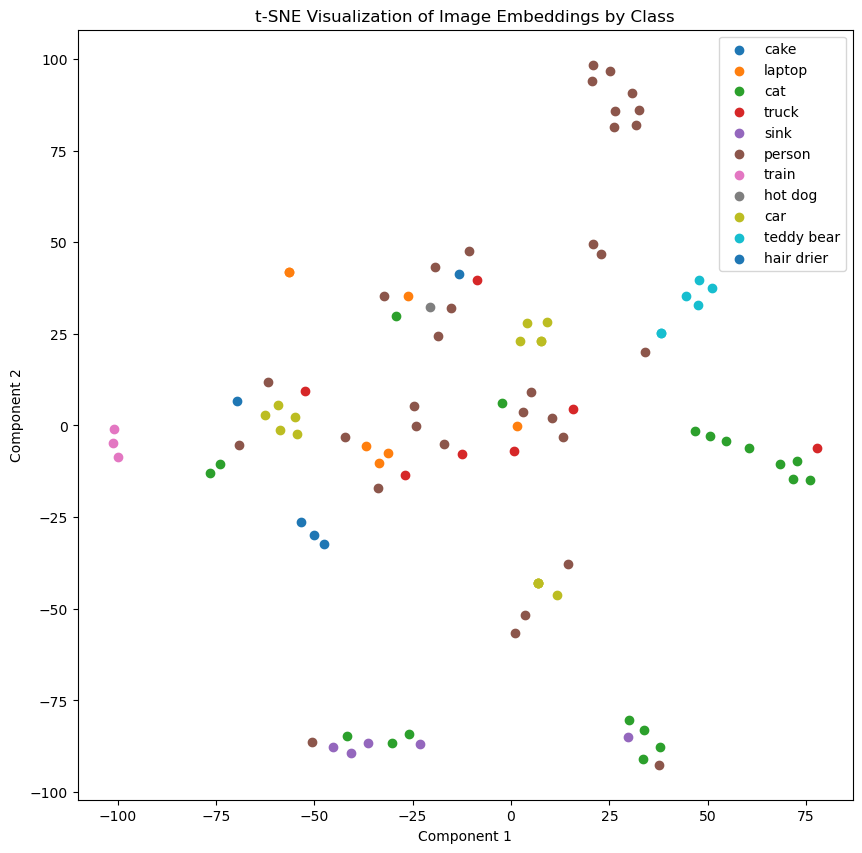

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


n_samples = min(100, len(images))  
embeddings = encoder.predict(images[:n_samples])

# Flatten the embeddings for t-SNE
flattened_embeddings = embeddings.reshape((embeddings.shape[0], -1))

# Perform t-SNE with a lower perplexity if necessary
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_results = tsne.fit_transform(flattened_embeddings)

# Plot t-SNE results with color coding by class
plt.figure(figsize=(10, 10))
for label in set(labels[:n_samples]):
    indices = [i for i, l in enumerate(labels[:n_samples]) if l == label]
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=label)
plt.legend()
plt.title("t-SNE Visualization of Image Embeddings by Class")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


#### Some classes like cat, person, car and teddy bear show distinct clusters. Other classes like sink and truck appear more spread out.
#### For further improvements, I could apply daa augmentation or apply other complex architectures. 

# Indexing the Embeddings